In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf

In [3]:
df3a = pd.read_csv('LoanStats3a.csv',skiprows=1,skipfooter=2)

/Users/Satish/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.



In [4]:
df3a.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [24]:
df3a[['mths_since_last_record', 'acc_now_delinq', 'acc_open_past_24mths', 'bc_util', 'issue_d']]

,mths_since_last_record,acc_now_delinq,acc_open_past_24mths,bc_util,issue_d
0,NaN,0.0,NaN,NaN,Dec-2011
1,NaN,0.0,NaN,NaN,Dec-2011
2,NaN,0.0,NaN,NaN,Dec-2011
3,NaN,0.0,NaN,NaN,Dec-2011
4,NaN,0.0,NaN,NaN,Dec-2011
5,NaN,0.0,NaN,NaN,Dec-2011
6,NaN,0.0,NaN,NaN,Dec-2011
7,NaN,0.0,NaN,NaN,Dec-2011
8,NaN,0.0,NaN,NaN,Dec-2011
9,NaN,0.0,NaN,NaN,Dec-2011


In [57]:
pd.isnull(df3a.tax_liens).value_counts()

False    42430
True       106
Name: tax_liens, dtype: int64

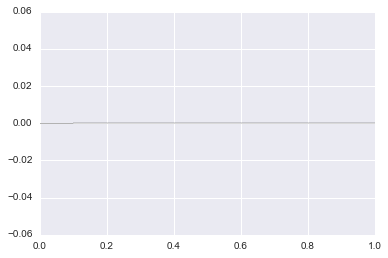

In [21]:
df3a.tax_liens.hist()

In [70]:
df3a.recoveries.unique()

array([    0.  ,   117.08,   189.06, ...,    28.63,   872.89,  4897.92])

In [72]:
df3a.chargeoff_within_12_mths.value_counts()

0.0    42390
Name: chargeoff_within_12_mths, dtype: int64

Since there are 111 columns , lets first find columns with null/empty through out so that we can quickly clean them up. We go for 111 columns to 57 columns which have some data. 

In [45]:
df3a.dropna(axis=1, how='all',inplace=True)

In [46]:
df3a.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

Now we can look for data to do some exploratory stuff.  

In [22]:
df3a.application_type.unique() ##Only one type, may not be that useful so not keeping it.

array(['INDIVIDUAL', None], dtype=object)

In [23]:
cols_to_keep=['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','issue_d','pymnt_plan','purpose','title','addr_state','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','loan_status']

In [72]:
df3a.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [24]:
df3a=df3a[cols_to_keep]

In [25]:
df3a.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', None,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

Remove the rows with NA for loan status

In [26]:
df3a.dropna(subset=['loan_status'],how='any',inplace=True)

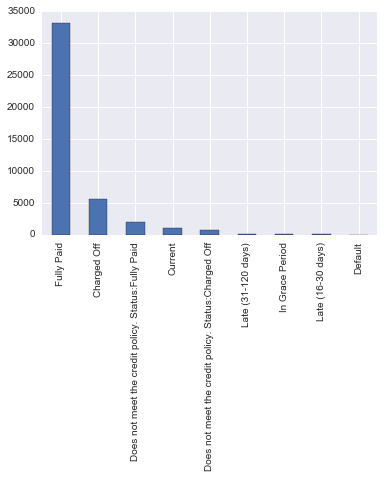

In [27]:
df3a.loan_status.value_counts().plot(kind='bar')

In [28]:
default_status = {'Fully Paid':1,'Charged Off':0,'Current':1,'In Grace Period':0,'Late (31-120 days)':0,'Default':0,'Does not meet the credit policy. Status:Fully Paid':1,'Does not meet the credit policy. Status:Charged Off':0,'Late (16-30 days)':0}

In [29]:
df3a['defaultYN']=df3a.loan_status.map(default_status)

In [30]:
df3a.defaultYN.value_counts()

1    36085
0     6450
Name: defaultYN, dtype: int64

In [31]:
#sns.countplot(x="defaultYN",data=df3a)
df3a.grade.value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

/Users/Satish/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



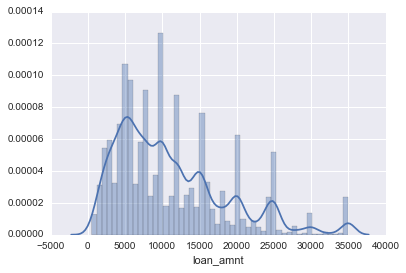

In [32]:
sns.distplot(df3a.loan_amnt)

ValueError: cannot convert float NaN to integer

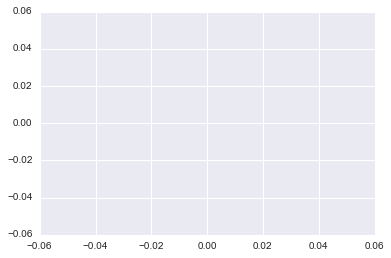

In [11]:
sns.distplot(df3a.annual_inc)

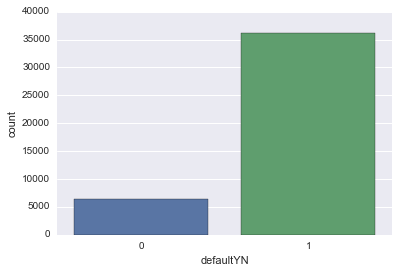

In [34]:
sns.countplot(df3a.defaultYN)